In [47]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import pylab as pl 


In [48]:
df = pd.read_csv('FuelConsumption.csv')
df.head(10)

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244
5,2014,ACURA,RLX,MID-SIZE,3.5,6,AS6,Z,11.9,7.7,10.0,28,230
6,2014,ACURA,TL,MID-SIZE,3.5,6,AS6,Z,11.8,8.1,10.1,28,232
7,2014,ACURA,TL AWD,MID-SIZE,3.7,6,AS6,Z,12.8,9.0,11.1,25,255
8,2014,ACURA,TL AWD,MID-SIZE,3.7,6,M6,Z,13.4,9.5,11.6,24,267
9,2014,ACURA,TSX,COMPACT,2.4,4,AS5,Z,10.6,7.5,9.2,31,212


In [49]:
cdf = df[['ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_CITY', 'FUELCONSUMPTION_HWY', 'FUELCONSUMPTION_COMB', 'CO2EMISSIONS' ]]
cdf

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,9.9,6.7,8.5,196
1,2.4,4,11.2,7.7,9.6,221
2,1.5,4,6.0,5.8,5.9,136
3,3.5,6,12.7,9.1,11.1,255
4,3.5,6,12.1,8.7,10.6,244
...,...,...,...,...,...,...
1062,3.0,6,13.4,9.8,11.8,271
1063,3.2,6,13.2,9.5,11.5,264
1064,3.0,6,13.4,9.8,11.8,271
1065,3.2,6,12.9,9.3,11.3,260


In [50]:
# from sklearn.preprocessing import StandardScaler
# StandardScaler(cdf)

In [51]:
msk = np.random.randn(len(df)) < 0.8
train = cdf[msk]
test = cdf[~msk]
# # train

# from sklearn.model_selection import train_test_split

# train_x , train_y, test_x, test_y = train_test_split()

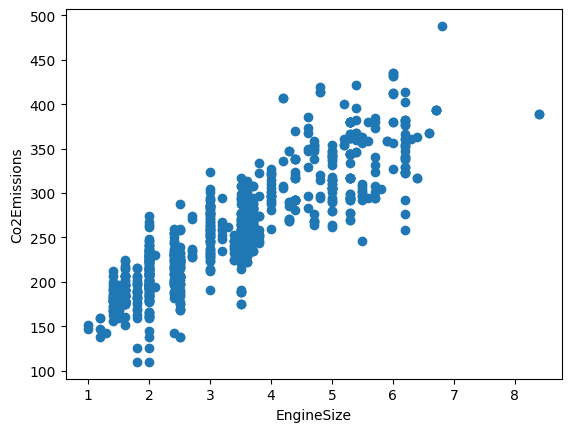

In [52]:
x1 = train['ENGINESIZE'].tolist()
y1 = train['CO2EMISSIONS'].tolist()
plt.scatter(x1, y1)
plt.xlabel('EngineSize')
plt.ylabel('Co2Emissions')
plt.show()

In [53]:
len(train['ENGINESIZE'])
len(train['CO2EMISSIONS'])

845

main program:

In [54]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
x = np.asanyarray(train[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB']])
y = np.asanyarray(train[['CO2EMISSIONS']])
regr.fit (x, y)
# The coefficients
print ('Coefficients: ', regr.coef_)
print(f'Intecept : {regr.intercept_}')

Coefficients:  [[11.48938085  8.03074513  8.8334532 ]]
Intecept : [68.56841625]


In [55]:
x

array([[ 2. ,  4. ,  8.5],
       [ 2.4,  4. ,  9.6],
       [ 3.5,  6. , 11.1],
       ...,
       [ 3. ,  6. , 11.8],
       [ 3.2,  6. , 11.3],
       [ 3.2,  6. , 12.8]])

In [56]:
x[:,0]

array([2. , 2.4, 3.5, 3.5, 3.5, 3.7, 3.7, 3.5, 5.9, 4.7, 4.7, 4.7, 5.9,
       2. , 2. , 2. , 2. , 2. , 2. , 3. , 3. , 3. , 3. , 3. , 4. , 3. ,
       3. , 4. , 6.3, 2. , 2. , 2. , 3. , 3. , 3. , 4.2, 4.2, 5.2, 4.2,
       5.2, 4.2, 4.2, 4. , 3. , 3. , 3. , 3. , 3. , 4. , 4. , 2. , 2. ,
       2. , 2. , 4. , 6. , 4. , 6. , 4. , 6. , 2. , 2. , 2. , 2. , 2. ,
       2. , 2. , 2. , 3. , 3. , 3. , 2. , 2. , 2. , 3. , 3. , 2. , 2. ,
       3. , 3. , 3. , 4.4, 4.4, 4.4, 4.4, 3. , 4.4, 4.4, 3. , 3. , 3. ,
       4.4, 4.4, 4.4, 4.4, 4.4, 4.4, 4.4, 4.4, 4.4, 2. , 2. , 3. , 4.4,
       4.4, 3. , 4.4, 2. , 3. , 3. , 3.6, 1.4, 1.4, 3.6, 3.6, 3.6, 3.6,
       2.4, 2. , 2. , 2. , 2.4, 2. , 2. , 2.4, 2. , 2.5, 3.6, 3.6, 3.6,
       3.6, 2. , 2. , 3.6, 3.6, 3. , 3.6, 3. , 3.6, 6.2, 6.2, 6.2, 6.2,
       6.2, 6.2, 6.2, 3.6, 3.6, 3.6, 3.6, 3.6, 3.6, 6.2, 6.2, 6.2, 6.2,
       6.2, 1.4, 1.4, 1.8, 1.8, 2. , 1.4, 3.6, 3.6, 2.4, 3.6, 3.6, 4.3,
       5.3, 5.3, 5.3, 5.3, 5.3, 5.3, 5.3, 5.3, 5.3, 5.3, 5.3, 5.

In [57]:
model = regr.intercept_[0] + (regr.coef_[0][0]*x[:, 0] + regr.coef_[0][1]*x[:, 1] + regr.coef_[0][2]*x[:, 2] )
# plt.plot(x, model)
# plt.scatter(x, y)
model

array([198.75451063, 213.06706149, 255.01705047, 245.30025196,
       246.18359728, 257.31492664, 261.73165324, 248.83363324,
       370.52657466, 316.66622926, 322.84964649, 322.84964649,
       370.52657466, 212.00469042, 205.82127319, 212.00469042,
       212.00469042, 205.82127319, 213.77138106, 247.50566941,
       224.5386911 , 250.15570537, 224.5386911 , 250.15570537,
       278.58992179, 225.42203642, 250.15570537, 289.19006563,
       376.00567233, 216.42141702, 215.5380717 , 204.93792787,
       231.60545365, 267.82261176, 247.50566941, 310.03819351,
       337.42189841, 344.65582717, 337.42189841, 344.65582717,
       298.55470435, 299.43804967, 290.07341095, 251.922396  ,
       260.7558492 , 251.922396  , 260.7558492 , 253.68908664,
       286.54002967, 292.72344691, 204.05458255, 204.05458255,
       214.65472638, 214.65472638, 292.72344691, 370.79216743,
       301.5569001 , 379.62562063, 302.44024542, 379.62562063,
       197.87116531, 201.40454659, 182.85429488, 182.85

my program:

In [58]:
# from sklearn import linear_model

# reg1 = linear_model.LinearRegression()
# reg2 = linear_model.LinearRegression()
# reg3 = linear_model.LinearRegression()

# x1 = np.asanyarray(train[['ENGINESIZE']])
# x2 = np.asanyarray(train[['CYLINDERS']])
# x3 = np.asanyarray(train[['FUELCONSUMPTION_COMB']])
#  #, 'CYLINDERS', 'FUELCONSUMPTION_COMB'
# y = np.asanyarray(train[['CO2EMISSIONS']])

# reg1.fit(x1, y)
# reg2.fit(x2, y)
# reg3.fit(x3, y)

# print(f'coefficients of x1 : {reg1.coef_}')
# print(f'intercept of x1: {reg1.intercept_}')

# print(f'coefficients of x2 : {reg2.coef_}')
# print(f'intercept of x2: {reg2.intercept_}')

# print(f'coefficients of x3 : {reg3.coef_}')
# print(f'intercept of x3: {reg3.intercept_}')

In [59]:
# intercept  === teta 0
# model1 = reg1.intercept_[0] + (reg1.coef_[0][0] * x1)
# model2 = reg2.intercept_[0] + (reg2.coef_[0][0] * x2)
# model3 = reg3.intercept_[0] + (reg3.coef_[0][0] * x3)
# plt.plot(x1,model1)
# plt.plot(x2,model2)
# plt.plot(x3,model3)
# plt.legend(['model of EngineSize', 'model of CYLINDERS', 'FUELCONSUMPTION_COMB'])

In [60]:
# sum_models = model1 + model2 + model3
# model == sum_models


[[ 2.   4.   8.5]
 [ 2.4  4.   9.6]
 [ 3.5  6.  11.1]
 ...
 [ 3.   6.  11.8]
 [ 3.2  6.  11.3]
 [ 3.2  6.  12.8]]


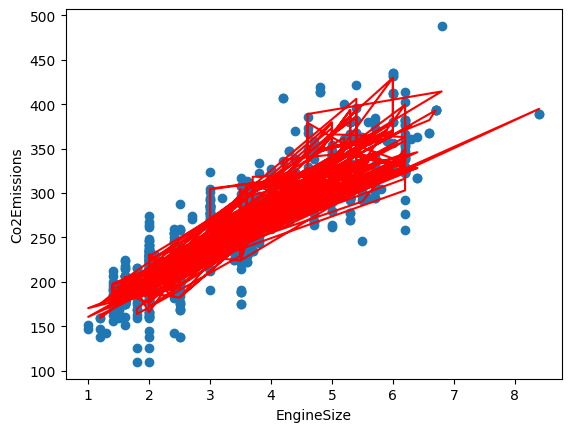

In [61]:
x1 = train['ENGINESIZE']
y1 = train['CO2EMISSIONS']
print(x)
# print('model :',model)
# print(len(model))
# model =reg.intercept_[0] + (reg.coef_[0][0] * train['ENGINESIZE']) + (reg.coef_[0][1] * train['CYLINDERS']) + (reg.coef_[0][2] * train['FUELCONSUMPTION_COMB'])

plt.scatter(x1, y1)
plt.plot(x1, model, color='red')
plt.xlabel('EngineSize')
plt.ylabel('Co2Emissions')
plt.show()